In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
# import some data to play with
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_y = pd.DataFrame(datasets.load_iris().target)

In [10]:
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6               0.2
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
14                 5.8               4.0                1.2               0.2
15                 5.7               4.4                1.5               0.4
16                 5.4               3.9                1.3               0.4
17                 5.1               3.5                1.4               0.3
18                 5.7               3.8                1.7               0.3
19                 5.1               3.8                1.5               0.3
20                 5.4               3.4                1.7               0.2
21                 5.1               3.7                1.5               0.4
22                 4.6               3.6                1.0               0.2
23                 5.1               3.3                1.7               0.5
24                 4.8               3.4                1.9               0.2
25                 5.0               3.0                1.6               0.2
26                 5.0               3.4                1.6               0.4
27                 5.2               3.5                1.5               0.2
28                 5.2               3.4                1.4               0.2
29                 4.7               3.2                1.6               0.2
..                 ...               ...                ...               ...
120                6.9               3.2                5.7               2.3
121                5.6               2.8                4.9               2.0
122                7.7               2.8                6.7               2.0
123                6.3               2.7                4.9               1.8
124                6.7               3.3                5.7               2.1
125                7.2               3.2                6.0               1.8
126                6.2               2.8                4.8               1.8
127                6.1               3.0                4.9               1.8
128                6.4               2.8                5.6               2.1
129                7.2               3.0                5.8               1.6
130                7.4               2.8                6.1               1.9
131                7.9               3.8                6.4               2.0
132                6.4               2.8                5.6               2.2
133                6.3               2.8                5.1               1.5
134                6.1               2.6                5.6               1.4
135                7.7               3.0                6.1               2.3
136                6.3               3.4                5.6               2.4
137                6.4               3.1                5.5               1.8
138                6.0               3.0                4.8               1.8
139                6.9     

In [6]:
list(datasets.load_iris().target_names)

['setosa', 'versicolor', 'virginica']

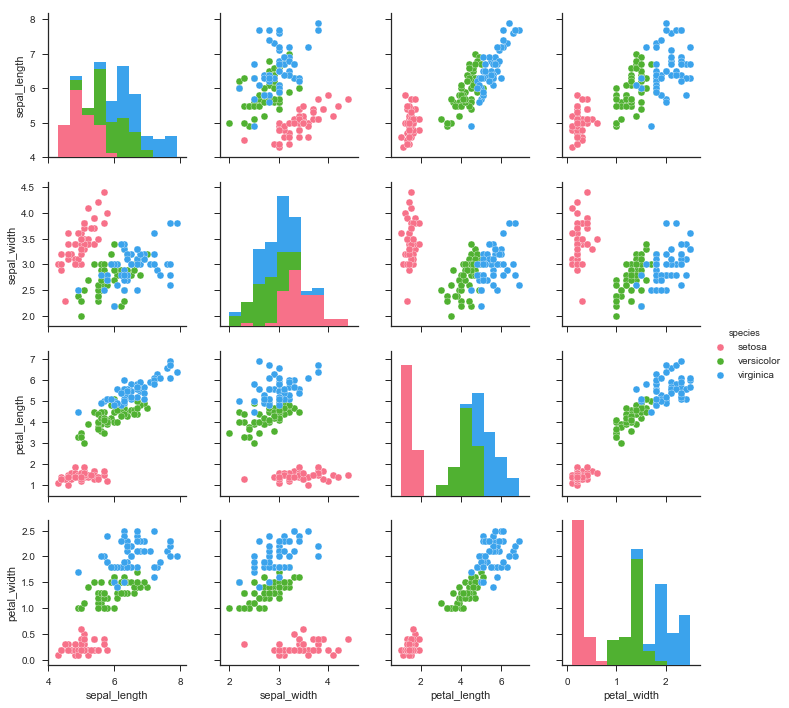

In [7]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sns.load_dataset("iris"), hue="species", palette="husl")

In [12]:
from sklearn.cross_validation import train_test_split

x = iris.drop(['sepal length (cm)', 'petal width (cm)'], axis=1)
y = np.array(datasets.load_iris().target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1007)

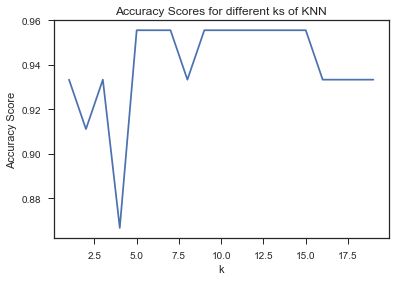

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_num = list(range(1,20))
acc_score = []

for k in k_num:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc_score.append(metrics.accuracy_score(y_test, pred))
    
plt.plot(k_num, acc_score)
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different ks of KNN')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.955555555556


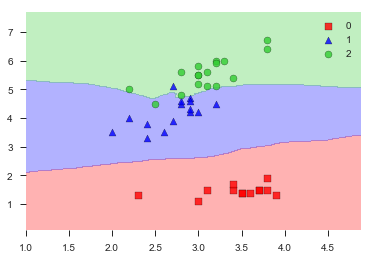

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x_test), y_test, knn)